In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Task1: Restaurant Reviews

###  Analyze the text reviews to identify the most common positive and negative keywords.

In [4]:
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

<Axes: title={'center': 'Analysis of Text reviews'}, xlabel='Reviews', ylabel='Counts'>

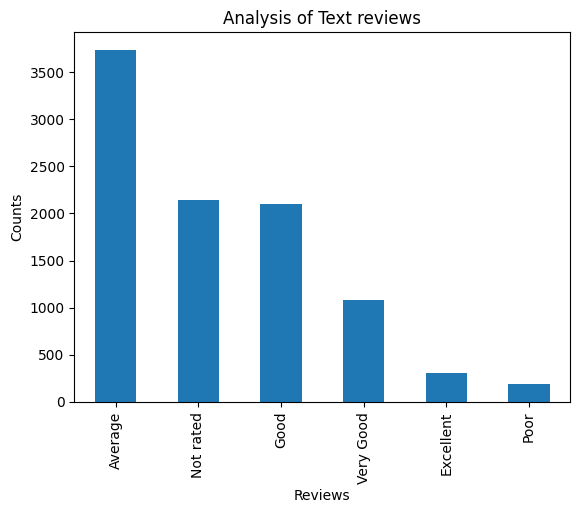

In [5]:
df['Rating text'].value_counts().plot(kind = 'bar' , title = 'Analysis of Text reviews' ,xlabel = 'Reviews' , ylabel = 'Counts')

In [6]:
df['Rating text'].replace({'Good':'Positive' ,'Excellent' :'Positive' , 'Very Good' :'Positive','Poor':'Negative','Average':'Neutral','Not rated':'Neutral'} , inplace = True)

<Axes: >

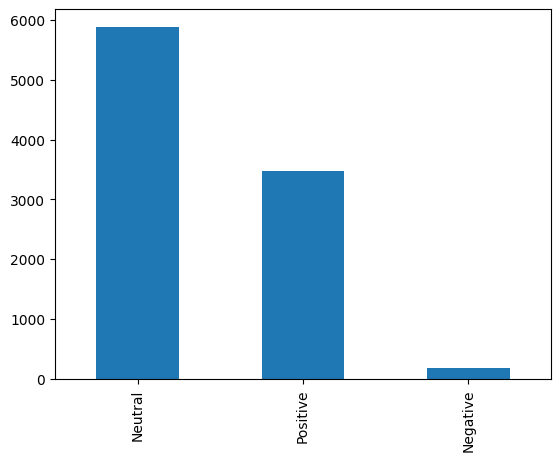

In [7]:
df['Rating text'].value_counts().plot(kind= 'bar')

### Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [8]:
data =pd.read_csv('Dataset .csv')

[nltk_data] Downloading package punkt to C:\Users\Mayur
[nltk_data]     Dalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mayur
[nltk_data]     Dalvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


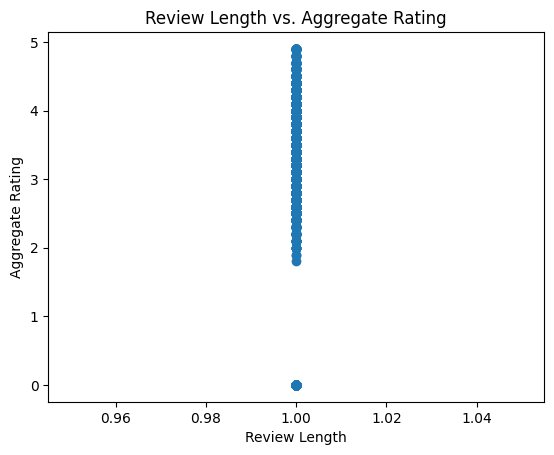

Most Common Positive Keywords: []
Most Common Negative Keywords: []
Average Review Length: 1.0


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
#data = pd.read_csv('Dataset.csv')  # Replace 'Dataset.csv' with the actual file name

def preprocess_text(text):
    # Clean and preprocess text reviews
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

data['Cleaned Reviews'] = data['Rating text'].apply(preprocess_text)

# Identify common positive and negative keywords
positive_keywords = Counter()
negative_keywords = Counter()

for index, row in data.iterrows():
    if row['Rating text'] == 'Positive':
        positive_keywords.update(row['Cleaned Reviews'])
    elif row['Rating text'] == 'Negative':
        negative_keywords.update(row['Cleaned Reviews'])

# Calculate average review length
data['Review Length'] = data['Cleaned Reviews'].apply(len)
average_review_length = data['Review Length'].mean()

# Explore relationship between review Length and rating
plt.scatter(data['Review Length'], data['Aggregate rating'])
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.title('Review Length vs. Aggregate Rating')
plt.show()

# Display results
print("Most Common Positive Keywords:", positive_keywords.most_common(10))
print("Most Common Negative Keywords:", negative_keywords.most_common(10))
print("Average Review Length:", average_review_length)

In [10]:
df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Positive,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Positive,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Positive,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Positive,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Positive,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Positive,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Positive,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Positive,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Positive,901


# Task2: Votes Analysis

###  Identify the restaurants with the highest and lowest number of votes

In [11]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Positive,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Positive,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Positive,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Positive,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Positive,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Positive,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Positive,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Positive,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Positive,901


In [12]:
resto_name = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False).head(1).index[0]
resto_votes = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False).head(1).values[0]


In [13]:
print(f'The Restaurant "{resto_name}" which is having highest number of votes is : {resto_votes}')

The Restaurant "Barbeque Nation" which is having highest number of votes is : 28142


In [14]:
resto_name = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False).tail(1).index[0]
resto_votes = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending = False).tail(1).values[0]


In [15]:
print(f'The Restaurant "{resto_name}" which is having Lowest number of votes that is : {resto_votes}')

The Restaurant "Food Station" which is having Lowest number of votes that is : 0


### Analyze if there is a correlation between the number of votes and the rating of a restaurant.


In [16]:
df[['Aggregate rating' ,'Votes']].corr()

,Aggregate rating,Votes
Aggregate rating,1.000000,0.313691
Votes,0.313691,1.000000


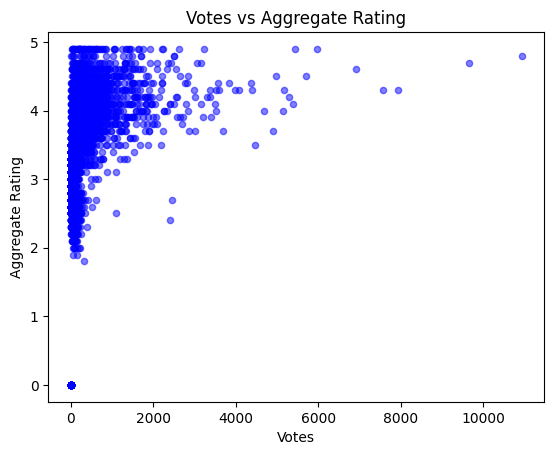

In [17]:
# Scatter plot for Votes vs Aggregate rating
df.plot(kind='scatter', x='Votes', y='Aggregate rating', alpha=0.5, color='blue')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

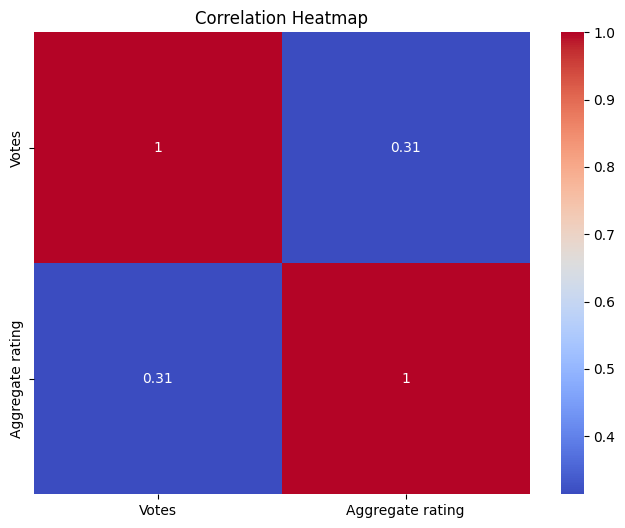

In [18]:
# Correlation heatmap
corr = df[['Votes', 'Aggregate rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Task3: Price Range vs. Online Delivery and Table Booking

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [19]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Positive,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Positive,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Positive,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Positive,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Positive,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Positive,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Positive,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Positive,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Positive,901


<Axes: xlabel='Has Online delivery', ylabel='Price range'>

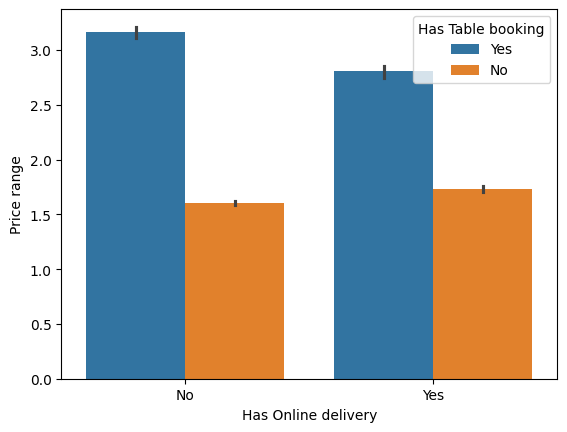

In [20]:
sns.barplot(data = df , x = 'Has Online delivery' , y = 'Price range' , hue = 'Has Table booking')

In [21]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
    
# Calculate correlation
correlation_matrix = df[['Price range', 'Has Online delivery', 'Has Table booking']].corr()
print(correlation_matrix)

                     Price range  Has Online delivery  Has Table booking
Price range             1.000000             0.077918           0.501925
Has Online delivery     0.077918             1.000000           0.101224
Has Table booking       0.501925             0.101224           1.000000


### Determine if higher-priced restaurants are more likely to offer these services

In [22]:
df_high_priced = df[df['Price range'] == df['Price range'].max()]
df_high_priced

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,No,No,4,4.4,Green,Positive,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,No,No,4,4.9,Dark Green,Positive,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,No,No,4,4.8,Dark Green,Positive,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),1,0,No,No,4,4.0,Green,Positive,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),1,0,No,No,4,4.2,Green,Positive,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,6000409,Cafemiz,208,Ankara,"Gaziosmanpa��a Mahallesi, Arjantin Caddesi, No...",Gazi Osman Pa��a,"Gazi Osman Pa��a, Ankara",32.865683,39.897872,"World Cuisine, Mexican, Italian",150,Turkish Lira(TL),0,0,No,No,4,4.4,Green,Positive,115
9526,6000019,Nusr-Et,208,Ankara,"Gaziosmanpa��a Mahallesi, �_ehit �_mer Haluk S...",Gazi Osman Pa��a,"Gazi Osman Pa��a, Ankara",32.864833,39.899667,Steak,400,Turkish Lira(TL),0,0,No,No,4,4.1,Green,Positive,97
9540,5927248,Draft Gastro Pub,208,��stanbul,"Caddebostan Mahallesi, Ba��dat Caddesi, No 349...",Caddebostan,"Caddebostan, ��stanbul",29.074116,40.963935,Bar Food,130,Turkish Lira(TL),0,0,No,No,4,4.9,Dark Green,Positive,522
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),0,0,No,No,4,3.7,Yellow,Positive,661


In [23]:
df_high_priced[['Has Table booking' ,'Has Online delivery' ,'Price range']]

,Has Table booking,Has Online delivery,Price range
2,1,0,4
3,0,0,4
4,1,0,4
6,1,0,4
7,1,0,4
...,...,...,...
9525,0,0,4
9526,0,0,4
9540,0,0,4
9548,0,0,4


In [24]:
df_high_priced['Has Online delivery'].value_counts()

0    533
1     53
Name: Has Online delivery, dtype: int64

<Axes: xlabel='has online delivery'>

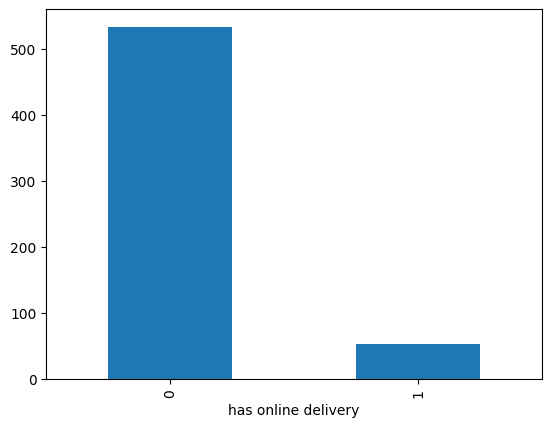

In [25]:
df_high_priced['Has Online delivery'].value_counts().plot(kind = 'bar' , xlabel = 'has online delivery')

# Conclusion : - the resto who are having max price range they are not providing online delivery 

In [26]:
df_high_priced['Has Table booking'].value_counts()

0    312
1    274
Name: Has Table booking, dtype: int64

<Axes: xlabel='Has Table booking'>

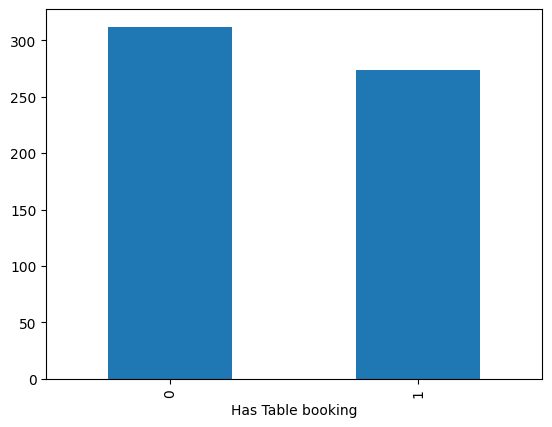

In [27]:
df_high_priced['Has Table booking'].value_counts().plot(kind = 'bar' , xlabel = 'Has Table booking')

# Conclusion : - the resto who are having max price range few of them resto (274) are  providing table booking and 312 resto are not providing the same 